In [2]:
%pylab inline

# (c) 2014 Reid Johnson and Everaldo Aguiar
#
# Functions to work with continuous data and linear regression models.

import matplotlib.pyplot as pl

def pairs(data):
    """Generates and shows a pairwise scatterplot of the dataset features.

    A figure with nxn scatterplots is generated, where n is the number of features. The features are
    defined as the all columns excluding the final column, which is defined as the class.

    Args:
      data (array): A dataset.

    """
    i = 1

    # Divide columns into features and class.
    features = list(data.columns)
    classes = features[-1] # create class column
    del features[-1] # delete class column from feature vector

    # Generate an nxn subplot figure, where n is the number of features.
    figure = pl.figure(figsize=(5*(len(data.columns)-1), 4*(len(data.columns)-1)))
    for col1 in data[features]:
        for col2 in data[features]:
            ax = pl.subplot(len(data.columns)-1, len(data.columns)-1, i)
            if col1 == col2:
                ax.text(2.5, 4.5, col1, style='normal', fontsize=20)
                ax.axis([0, 10, 0, 10])
                pl.xticks([]), pl.yticks([])
            else:
                for name in data[classes]:
                    cond = data[classes] == name
                    ax.plot(data[col2][cond], data[col1][cond], linestyle='none', marker='o', label=name)
                #t = plt.title(name)
            i += 1

    pl.show()

Populating the interactive namespace from numpy and matplotlib


In [8]:
import pandas as pd
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species'], header=None)
iris = iris.dropna()

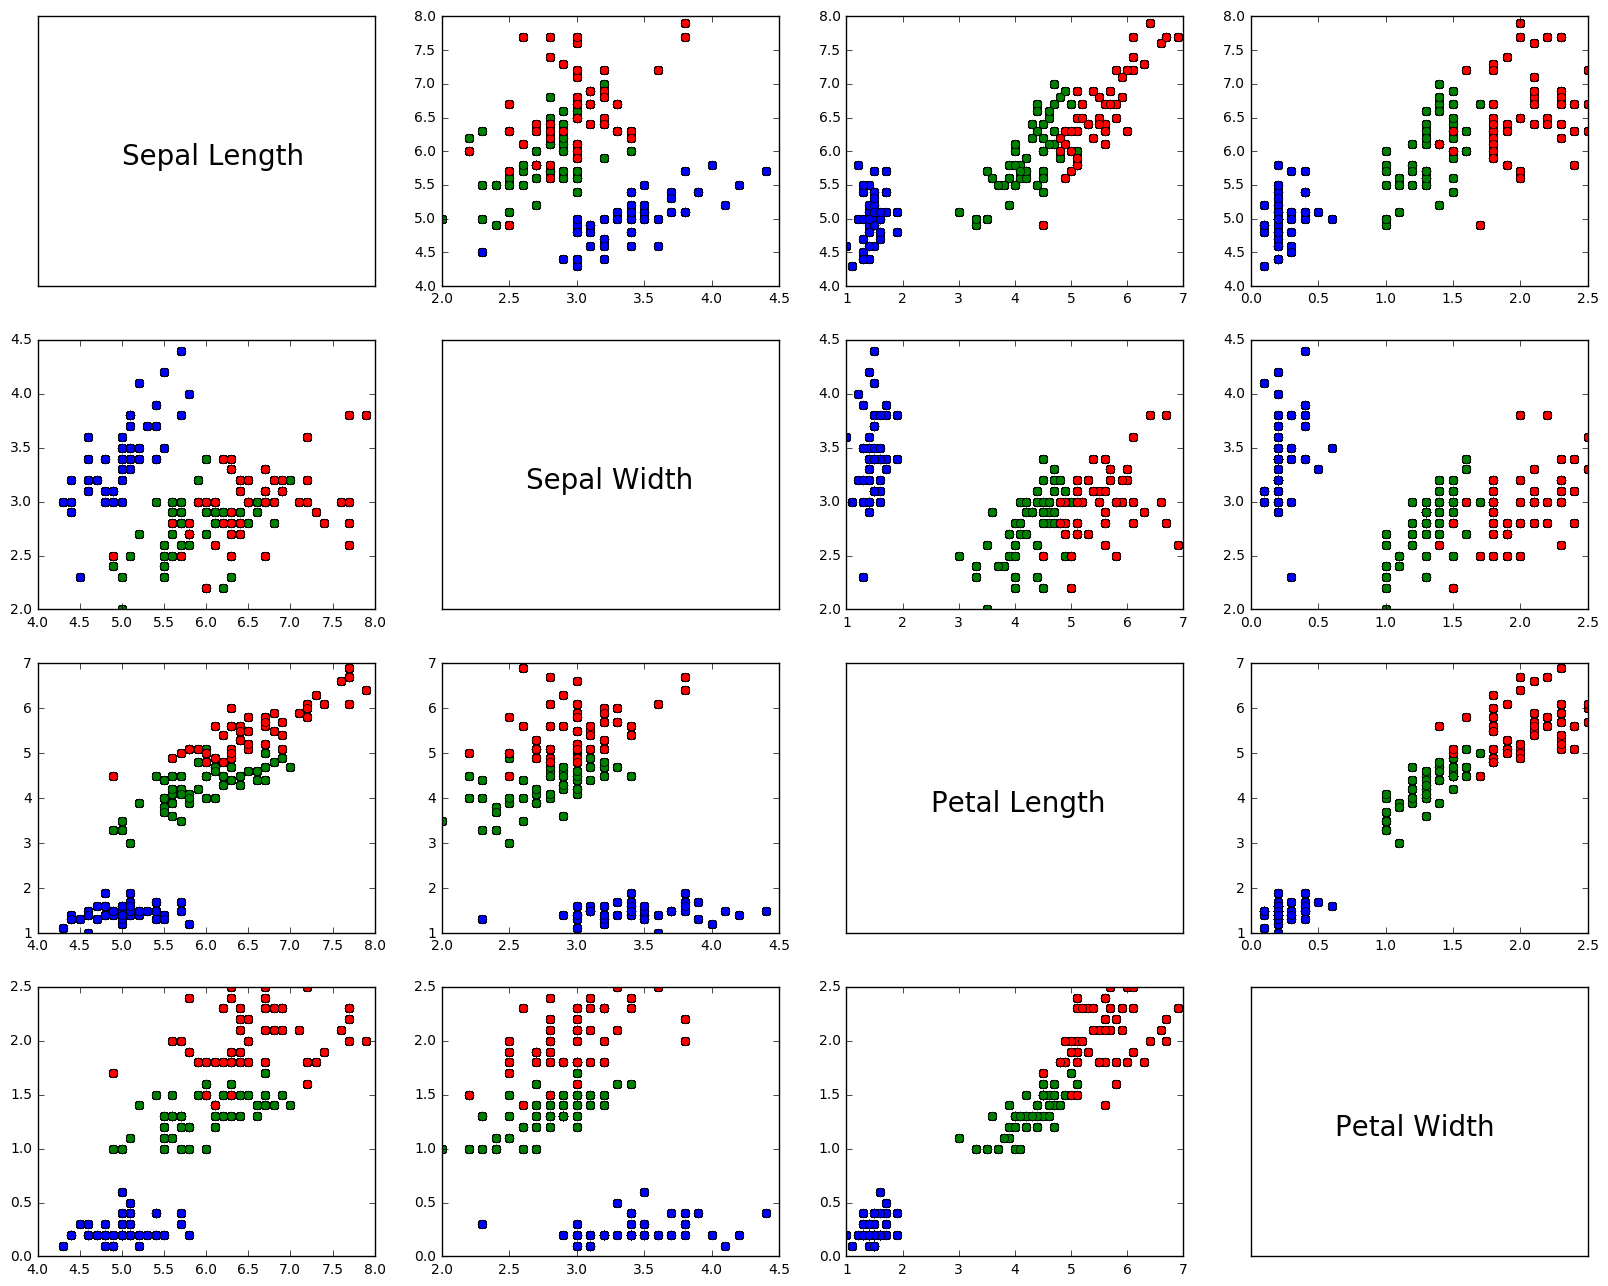

In [10]:
pairs(iris)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

In [119]:
features = list(iris.columns)
del features[-1]
features

['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [120]:
train, test = train_test_split(iris, test_size=0.35)

Use  Sepal Length
to predict  Sepal Width
Coefficients: 
 [[-0.05764542]]
Residual sum of squares : 0.00
Variance score: -0.01


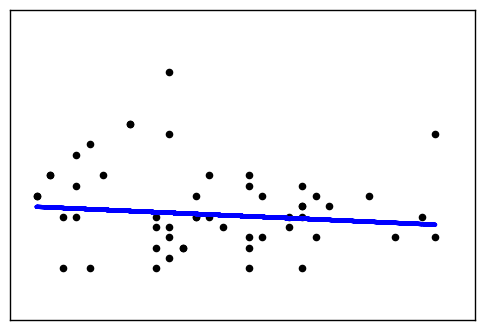

Use  Sepal Length
to predict  Petal Length
Coefficients: 
 [[ 1.8781011]]
Residual sum of squares : 0.00
Variance score: 0.74


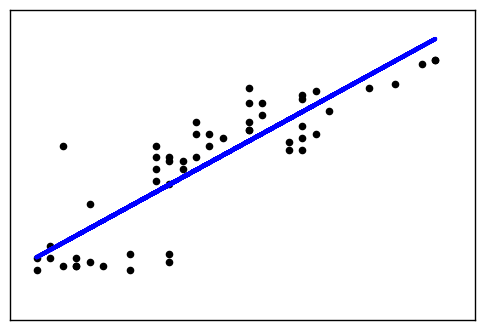

Use  Sepal Length
to predict  Petal Width
Coefficients: 
 [[ 0.78141686]]
Residual sum of squares : 0.00
Variance score: 0.60


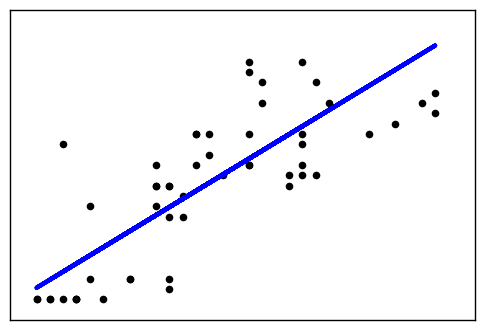

Use  Sepal Width
to predict  Sepal Length
Coefficients: 
 [[-0.20017577]]
Residual sum of squares : 0.06
Variance score: -0.07


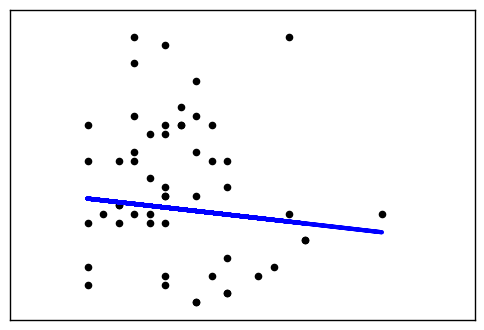

Use  Sepal Width
to predict  Petal Length
Coefficients: 
 [[-1.73726461]]
Residual sum of squares : 0.25
Variance score: 0.09


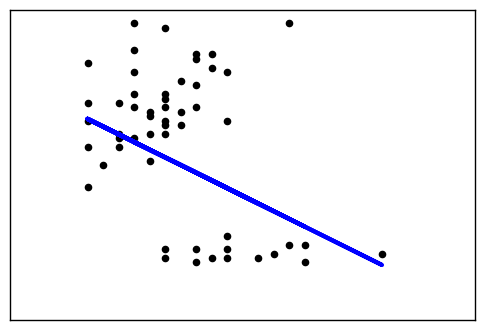

Use  Sepal Width
to predict  Petal Width
Coefficients: 
 [[-0.66446952]]
Residual sum of squares : 0.04
Variance score: 0.03


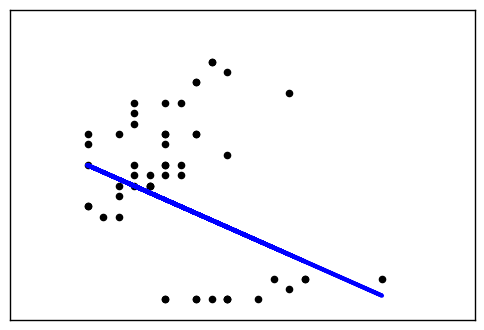

Use  Petal Length
to predict  Sepal Length
Coefficients: 
 [[ 0.40647106]]
Residual sum of squares : 0.00
Variance score: 0.74


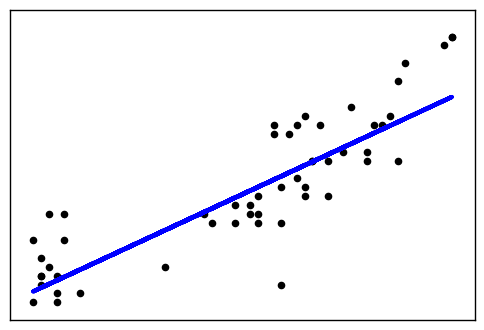

Use  Petal Length
to predict  Sepal Width
Coefficients: 
 [[-0.10827543]]
Residual sum of squares : 0.01
Variance score: 0.12


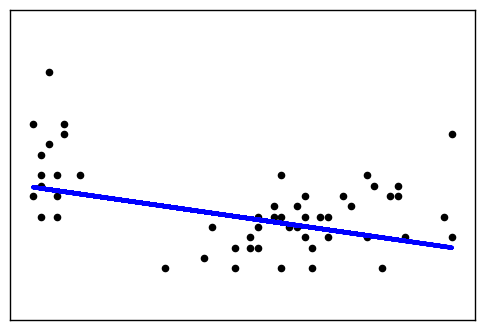

Use  Petal Length
to predict  Petal Width
Coefficients: 
 [[ 0.42076132]]
Residual sum of squares : 0.00
Variance score: 0.92


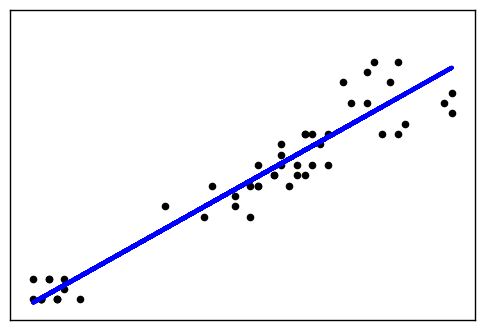

Use  Petal Width
to predict  Sepal Length
Coefficients: 
 [[ 0.88901901]]
Residual sum of squares : 0.01
Variance score: 0.60


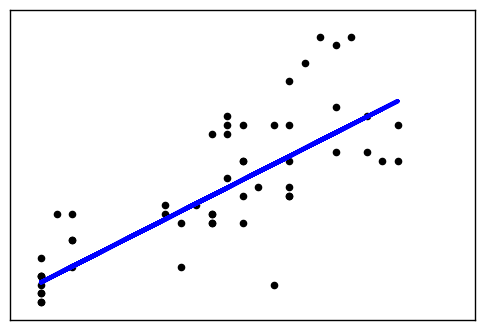

Use  Petal Width
to predict  Sepal Width
Coefficients: 
 [[-0.21769909]]
Residual sum of squares : 0.01
Variance score: 0.06


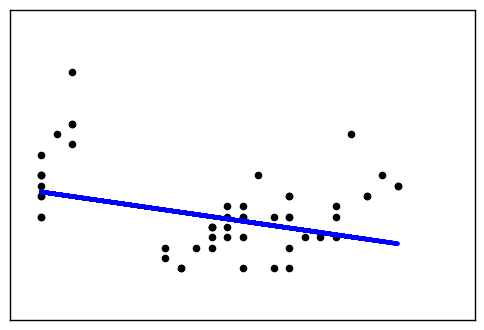

Use  Petal Width
to predict  Petal Length
Coefficients: 
 [[ 2.21183849]]
Residual sum of squares : 0.00
Variance score: 0.92


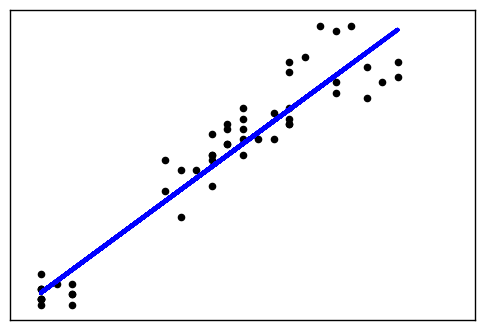

In [121]:
import numpy as np

    
#use one feature to predict one feature
for col1 in features:
        for col2 in features:
            if col1 == col2:
                continue
            else:
                x_train = train[col1]
                x_test = test[col1]
                y_train = train[col2]
                y_test = test[col2]
                regr = LinearRegression()
                x_train = x_train.values.reshape(len(x_train),1)
                x_test = x_test.values.reshape(len(x_test),1)
                y_train = y_train.values.reshape(len(y_train),1)
                y_test = y_test.values.reshape(len(y_test),1)
                regr.fit(x_train, y_train)
                y_pred = regr.predict(x_test)
                # The coefficients
                print('Use ', col1)
                print('to predict ', col2)
                print('Coefficients: \n', regr.coef_)
                print('Residual sum of squares : %.2f' % np.mean(y_pred - y_test) ** 2)
                # Explained variance score (1 is perfect prediction)
                print('Variance score: %.2f' % regr.score(x_test , y_test))
                plt.scatter(x_test, y_test,  color='black')
                plt.plot(x_test, y_pred, color='blue',linewidth=3)
                plt.xticks(())
                plt.yticks(())
                
                plt.show()

In [127]:
# use two features to predict one feature
for col1 in features:
    for col2 in features:
        for col3 in features:
            if col1 == col2 or col1 == col3 or col2 == col3:
                continue
            else:
                x_train = train[[col1,col2]]
                x_test = test[[col1,col2]]
                y_train = train[col3]
                y_test = test[col3]
                regr = LinearRegression()
                x_train = x_train.values.reshape(len(x_train),2)
                x_test = x_test.values.reshape(len(x_test),2)
                y_train = y_train.values.reshape(len(y_train),1)
                y_test = y_test.values.reshape(len(y_test),1)
                regr.fit(x_train, y_train)
                y_pred = regr.predict(x_test)
                # The coefficients
                print('Use ', col1,col2)
                print('to predict ', col3)
                print('Coefficients: \n', regr.coef_)
                print('Residual sum of squares : %.2f' % np.mean(y_pred - y_test) ** 2)
                # Explained variance score (1 is perfect prediction)
                print('Variance score: %.2f \n' % regr.score(x_test , y_test))

Use  Sepal Length Sepal Width
to predict  Petal Length
Coefficients: 
 [[ 1.79871148 -1.37720615]]
Residual sum of squares : 0.01
Variance score: 0.83 

Use  Sepal Length Sepal Width
to predict  Petal Width
Coefficients: 
 [[ 0.75178828 -0.51397972]]
Residual sum of squares : 0.00
Variance score: 0.64 

Use  Sepal Length Petal Length
to predict  Sepal Width
Coefficients: 
 [[ 0.61581968 -0.35858831]]
Residual sum of squares : 0.00
Variance score: 0.32 

Use  Sepal Length Petal Length
to predict  Petal Width
Coefficients: 
 [[-0.03725783  0.43590555]]
Residual sum of squares : 0.00
Variance score: 0.92 

Use  Sepal Length Petal Width
to predict  Sepal Width
Coefficients: 
 [[ 0.36837954 -0.54519551]]
Residual sum of squares : 0.00
Variance score: 0.05 

Use  Sepal Length Petal Width
to predict  Petal Length
Coefficients: 
 [[ 0.49043723  1.77583047]]
Residual sum of squares : 0.00
Variance score: 0.95 

Use  Sepal Width Sepal Length
to predict  Petal Length
Coefficients: 
 [[-1.37720615

In [131]:
# use three features to predict one feature
for col1 in features:
    for col2 in features:
        for col3 in features:
            for col4 in features:
                if col1 == col2 or col1 == col3 or col1 == col4 or col2 == col3 or col2 == col4 or col3 == col4:
                    continue
                else:
                    x_train = train[[col1,col2,col3]]
                    x_test = test[[col1,col2,col3]]
                    y_train = train[col4]
                    y_test = test[col4]
                    regr = LinearRegression()
                    x_train = x_train.values.reshape(len(x_train),3)
                    x_test = x_test.values.reshape(len(x_test),3)
                    y_train = y_train.values.reshape(len(y_train),1)
                    y_test = y_test.values.reshape(len(y_test),1)
                    regr.fit(x_train, y_train)
                    y_pred = regr.predict(x_test)
                    # The coefficients
                    print('Use ', col1,col2,col3)
                    print('to predict ', col4)
                    print('Coefficients: \n', regr.coef_)
                    print('Residual sum of squares : %.2f' % np.mean(y_pred - y_test) ** 2)
                    # Explained variance score (1 is perfect prediction)
                    print('Variance score: %.2f \n' % regr.score(x_test , y_test))

Use  Sepal Length Sepal Width Petal Length
to predict  Petal Width
Coefficients: 
 [[-0.14232018  0.17060571  0.49708276]]
Residual sum of squares : 0.00
Variance score: 0.94 

Use  Sepal Length Sepal Width Petal Width
to predict  Petal Length
Coefficients: 
 [[ 0.72814789 -0.64528736  1.4240227 ]]
Residual sum of squares : 0.00
Variance score: 0.97 

Use  Sepal Length Petal Length Sepal Width
to predict  Petal Width
Coefficients: 
 [[-0.14232018  0.49708276  0.17060571]]
Residual sum of squares : 0.00
Variance score: 0.94 

Use  Sepal Length Petal Length Petal Width
to predict  Sepal Width
Coefficients: 
 [[ 0.63092638 -0.53533219  0.4054637 ]]
Residual sum of squares : 0.00
Variance score: 0.46 

Use  Sepal Length Petal Width Sepal Width
to predict  Petal Length
Coefficients: 
 [[ 0.72814789  1.4240227  -0.64528736]]
Residual sum of squares : 0.00
Variance score: 0.97 

Use  Sepal Length Petal Width Petal Length
to predict  Sepal Width
Coefficients: 
 [[ 0.63092638  0.4054637  -0.535

### 1. Based upon the linear models you generated, which pair of features appear to be most predictive for one another? Note that you can answer this question based upon the output provided for the linear models.

### Answer: According to the result above,  
### 1. Petal Length is the most predictive for Petal Width. 
### 2. Sepal Length & Petal Width are the most predictive pair for Petal Length
### 3. The other three features are the most predictive triple for Petal Length

In [142]:
# remove "Petal Width" from the dataset
fileURL = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(fileURL, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Species'], header=None)
iris = iris.dropna()

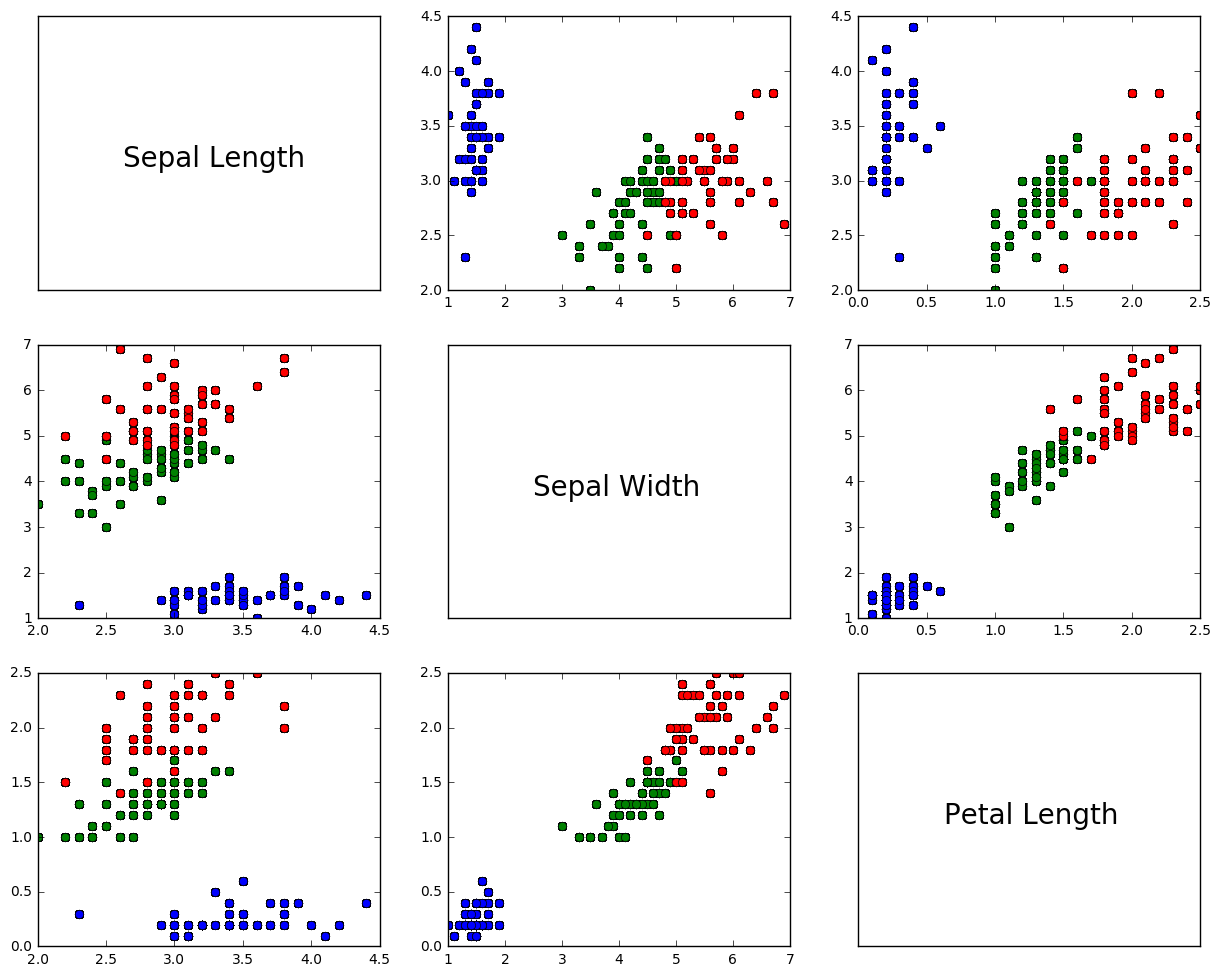

In [143]:
pairs(iris)

In [144]:
features = list(iris.columns)
del features[-1]
train, test = train_test_split(iris, test_size=0.35)

Use  Sepal Length
to predict  Sepal Width
Coefficients: 
 [[-2.12646431]]
Residual sum of squares : 0.16
Variance score: -0.03


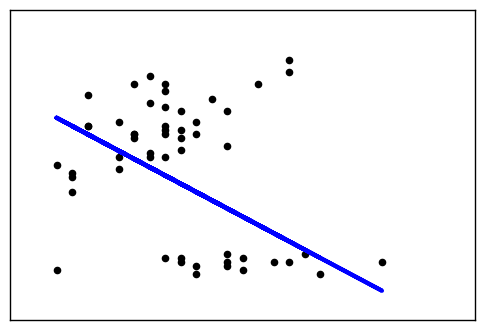

Use  Sepal Length
to predict  Petal Length
Coefficients: 
 [[-0.78896812]]
Residual sum of squares : 0.03
Variance score: -0.05


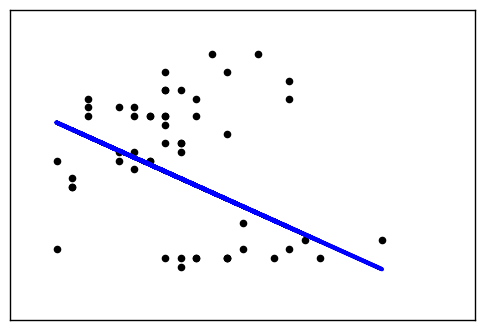

Use  Sepal Width
to predict  Sepal Length
Coefficients: 
 [[-0.12120666]]
Residual sum of squares : 0.01
Variance score: 0.01


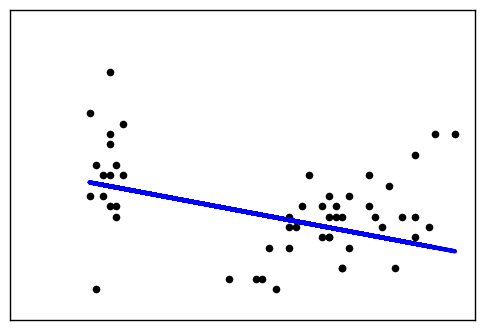

Use  Sepal Width
to predict  Petal Length
Coefficients: 
 [[ 0.41813377]]
Residual sum of squares : 0.00
Variance score: 0.93


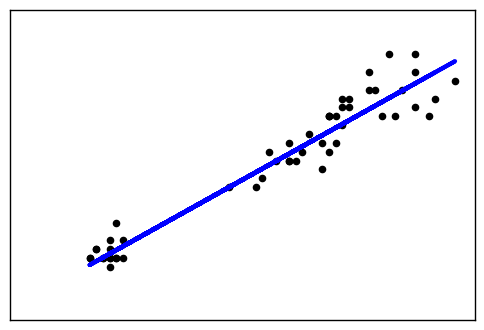

Use  Petal Length
to predict  Sepal Length
Coefficients: 
 [[-0.23744502]]
Residual sum of squares : 0.01
Variance score: 0.00


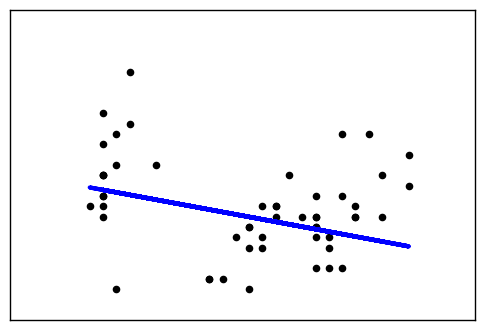

Use  Petal Length
to predict  Sepal Width
Coefficients: 
 [[ 2.20775292]]
Residual sum of squares : 0.00
Variance score: 0.93


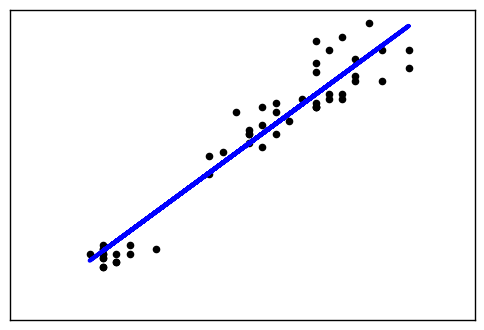

In [145]:
for col1 in features:
        for col2 in features:
            if col1 == col2:
                continue
            else:
                x_train = train[col1]
                x_test = test[col1]
                y_train = train[col2]
                y_test = test[col2]
                regr = LinearRegression()
                x_train = x_train.values.reshape(len(x_train),1)
                x_test = x_test.values.reshape(len(x_test),1)
                y_train = y_train.values.reshape(len(y_train),1)
                y_test = y_test.values.reshape(len(y_test),1)
                regr.fit(x_train, y_train)
                y_pred = regr.predict(x_test)
                # The coefficients
                print('Use ', col1)
                print('to predict ', col2)
                print('Coefficients: \n', regr.coef_)
                print('Residual sum of squares : %.2f' % np.mean(y_pred - y_test) ** 2)
                # Explained variance score (1 is perfect prediction)
                print('Variance score: %.2f' % regr.score(x_test , y_test))
                plt.scatter(x_test, y_test,  color='black')
                plt.plot(x_test, y_pred, color='blue',linewidth=3)
                plt.xticks(())
                plt.yticks(())
                
                plt.show()

### 2.Suppose you tried to generate a classification model on this dataset, but only after removing the feature that you were best able to predict based upon other features. How would removing this feature affect the classification performance?

### Answer: Acoording to the result above, I remove the feature "Petal Width" from the dataset, some result decrease but some other result increase(Petal Length <-> Sepal Width) dramatically. So remove one feature in the dataset may make other features' correlations become more weak/obvious. 